<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Models_EVALS_75%25/Voting_85_75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [2]:
!pip install tensorflow==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 14 kB/s 
     |████████████████████████████████| 1.2 MB 42.5 MB/s 
     |████████████████████████████████| 462 kB 14.1 MB/s 
     |████████████████████████████████| 14.8 MB 471 kB/s 
     |████████████████████████████████| 4.0 MB 43.9 MB/s 
     |████████████████████████████████| 132 kB 79.8 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68718 sha256=00007bb831d13ddfc882ea4503b5af6b575a52194c7786d80b469b3177fcebc0
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: nu

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score

In [4]:
df  = pd.read_csv("https://raw.githubusercontent.com/Noob919/Feature_selection/main/Data/house-votes-84.csv")
for i in range((len(df.columns))):
  if(df[df.columns[i]].dtype == 'object'):
    df[df.columns[i]] =  df[df.columns[i]].replace("?", df[df.columns[i]].value_counts().index[0])
for i in range((len(df.columns))):
   df[df.columns[i]]  =  LabelEncoder().fit_transform(df[df.columns[i]])
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [5]:
X = df.drop(['Class Name'],axis =1)
y = df['Class Name']

In [6]:
rank1 = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "Chi_2").set_index('Attributes_Names')
df_chi = df[rank1[:12].index]

In [7]:
X_col =  df_chi
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 12)
Shape of testing data (87, 12)


In [8]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [9]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
batch_normalization (BatchNo (None, 8)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2

In [11]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
11/11 [==============================] - 2s 39ms/step - loss: 0.5751 - accuracy: 0.7471 - val_loss: 0.6083 - val_accuracy: 0.8276
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5064 - accuracy: 0.7759 - val_loss: 0.5831 - val_accuracy: 0.8161
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.4658 - accuracy: 0.7845 - val_loss: 0.5555 - val_accuracy: 0.8161
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.4215 - accuracy: 0.8333 - val_loss: 0.5295 - val_accuracy: 0.8276
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.4080 - accuracy: 0.8477 - val_loss: 0.4996 - val_accuracy: 0.8391
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.3774 - accuracy: 0.8477 - val_loss: 0.4713 - val_accuracy: 0.8391
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.3452 - accuracy: 0.8649 - val_loss: 0.4462 - val_accuracy: 0.8391
Epoch 8/100


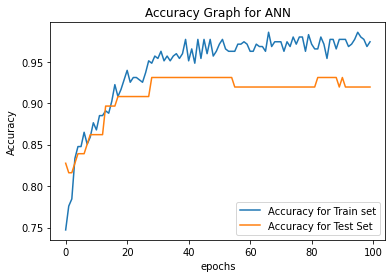

In [12]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

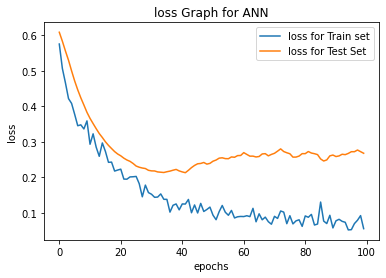

In [13]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [14]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

Accuracy:  0.9195402298850575
Recall:  0.8857142857142857
Precision:  0.9117647058823529
[[49  3]
 [ 4 31]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [15]:
rank2  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "Tree_based_method").set_index('Attributes_Names')
df_tree = df[rank2[0:12].index]
X_col =  df_tree
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 12)
Shape of testing data (87, 12)


In [16]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [17]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
batch_normalization_3 (Batch (None, 16)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [19]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
11/11 [==============================] - 2s 18ms/step - loss: 0.8048 - accuracy: 0.5115 - val_loss: 0.6047 - val_accuracy: 0.7011
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 0.6499 - accuracy: 0.6207 - val_loss: 0.5779 - val_accuracy: 0.7356
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5760 - accuracy: 0.6897 - val_loss: 0.5520 - val_accuracy: 0.8621
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5176 - accuracy: 0.7557 - val_loss: 0.5251 - val_accuracy: 0.8621
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.4746 - accuracy: 0.7529 - val_loss: 0.4981 - val_accuracy: 0.8736
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.4723 - accuracy: 0.7960 - val_loss: 0.4717 - val_accuracy: 0.8851
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.3983 - accuracy: 0.8190 - val_loss: 0.4381 - val_accuracy: 0.8851
Epoch 8/100


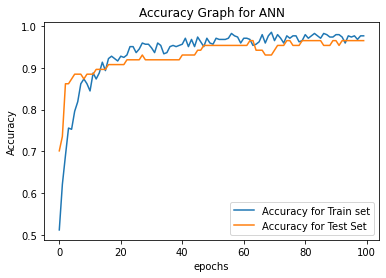

In [20]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

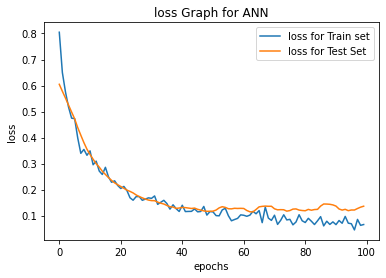

In [21]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [22]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

Accuracy:  0.9655172413793104
Recall:  0.9714285714285714
Precision:  0.9444444444444444
[[50  2]
 [ 1 34]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
rank3  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "permutation_method_mean").set_index('Attributes_Names')
df_per_mean = df[rank3[0:12].index]
X_col =  df_per_mean
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 12)
Shape of testing data (87, 12)


In [24]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9540229885057471
Recall:  0.9428571428571428
Precision:  0.9428571428571428
[[50  2]
 [ 2 33]]


In [25]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
batch_normalization_4 (Batch (None, 8)                 32        
_________________________________________________________________
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
batch_normalization_5 (Batch (None, 16)                64        
_________________________________________________________________
dense_10 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [27]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 3s 36ms/step - loss: 0.5446 - accuracy: 0.7098 - val_loss: 0.5417 - val_accuracy: 0.8736
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4870 - accuracy: 0.7500 - val_loss: 0.4959 - val_accuracy: 0.9310
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4402 - accuracy: 0.8017 - val_loss: 0.4487 - val_accuracy: 0.9425
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.4163 - accuracy: 0.8103 - val_loss: 0.4033 - val_accuracy: 0.9195
Epoch 5/50
11/11 [==============================] - 0s 6ms/step - loss: 0.3475 - accuracy: 0.8563 - val_loss: 0.3624 - val_accuracy: 0.9425
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.3345 - accuracy: 0.8764 - val_loss: 0.3230 - val_accuracy: 0.9425
Epoch 7/50
11/11 [==============================] - 0s 8ms/step - loss: 0.2837 - accuracy: 0.8851 - val_loss: 0.2883 - val_accuracy: 0.9425
Epoch 8/50
11/11 [=

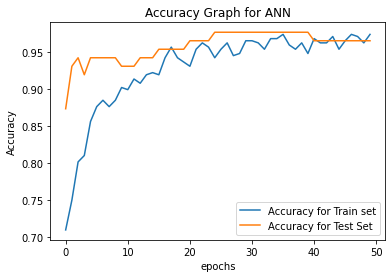

In [28]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()


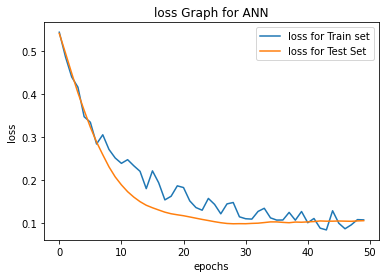

In [29]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [30]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

Accuracy:  0.9655172413793104
Recall:  0.9428571428571428
Precision:  0.9705882352941176
[[51  1]
 [ 2 33]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
rank4  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "permutation_method_std").set_index('Attributes_Names')
df_per_std  = df[rank4[0:12].index]
X_col =  df_per_std
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 12)
Shape of testing data (87, 12)


In [32]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [33]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 104       
_________________________________________________________________
batch_normalization_6 (Batch (None, 8)                 32        
_________________________________________________________________
dense_13 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_7 (Batch (None, 16)                64        
_________________________________________________________________
dense_14 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [35]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 2s 37ms/step - loss: 0.7030 - accuracy: 0.6466 - val_loss: 0.6674 - val_accuracy: 0.5862
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6294 - accuracy: 0.7040 - val_loss: 0.6205 - val_accuracy: 0.7471
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.5519 - accuracy: 0.7557 - val_loss: 0.5763 - val_accuracy: 0.8621
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4758 - accuracy: 0.7902 - val_loss: 0.5339 - val_accuracy: 0.8851
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4610 - accuracy: 0.7931 - val_loss: 0.4958 - val_accuracy: 0.9080
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.3906 - accuracy: 0.8534 - val_loss: 0.4598 - val_accuracy: 0.9080
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 0.3720 - accuracy: 0.8563 - val_loss: 0.4251 - val_accuracy: 0.9195
Epoch 8/50
11/11 [=

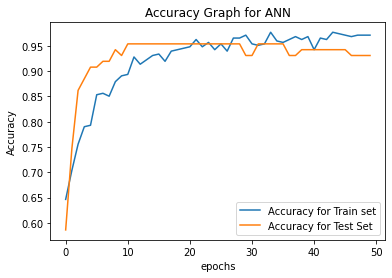

In [36]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

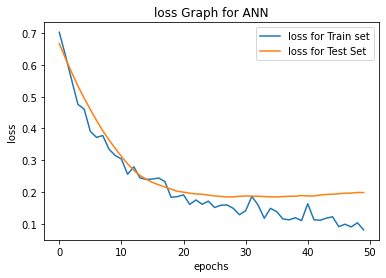

In [37]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


In [38]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

Accuracy:  0.9310344827586207
Recall:  0.8571428571428571
Precision:  0.967741935483871
[[51  1]
 [ 5 30]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [39]:
rank5  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "PCA").set_index('Attributes_Names')
df_pca  = df[rank5[:12].index]
X_col =  df_pca
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 12)
Shape of testing data (87, 12)


In [40]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9425287356321839
Recall:  0.8857142857142857
Precision:  0.96875
[[51  1]
 [ 4 31]]


In [41]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
batch_normalization_8 (Batch (None, 8)                 32        
_________________________________________________________________
dense_17 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_9 (Batch (None, 16)                64        
_________________________________________________________________
dense_18 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [43]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 2s 38ms/step - loss: 0.7530 - accuracy: 0.5316 - val_loss: 0.6454 - val_accuracy: 0.6207
Epoch 2/50
11/11 [==============================] - 0s 13ms/step - loss: 0.6436 - accuracy: 0.6063 - val_loss: 0.6204 - val_accuracy: 0.6322
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.5962 - accuracy: 0.7213 - val_loss: 0.5955 - val_accuracy: 0.6552
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.5373 - accuracy: 0.7471 - val_loss: 0.5696 - val_accuracy: 0.7241
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4932 - accuracy: 0.7874 - val_loss: 0.5401 - val_accuracy: 0.8276
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4695 - accuracy: 0.7960 - val_loss: 0.5074 - val_accuracy: 0.8391
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4212 - accuracy: 0.8649 - val_loss: 0.4736 - val_accuracy: 0.8851
Epoch 8/50
11/11 [

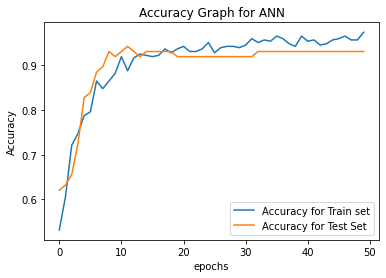

In [44]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

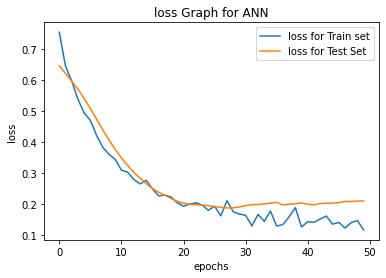

In [45]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [46]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

Accuracy:  0.9310344827586207
Recall:  0.9142857142857143
Precision:  0.9142857142857143
[[49  3]
 [ 3 32]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [48]:
rank6  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "F_test").set_index('Attributes_Names')
df_f_test  = df[rank6[:12].index]
X_col =  df_f_test
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 12)
Shape of testing data (87, 12)


In [49]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9540229885057471
Recall:  0.9428571428571428
Precision:  0.9428571428571428
[[50  2]
 [ 2 33]]


In [50]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 104       
_________________________________________________________________
batch_normalization_10 (Batc (None, 8)                 32        
_________________________________________________________________
dense_21 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_11 (Batc (None, 16)                64        
_________________________________________________________________
dense_22 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_5 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [52]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 2s 33ms/step - loss: 0.9261 - accuracy: 0.5000 - val_loss: 0.6991 - val_accuracy: 0.5287
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 0.7890 - accuracy: 0.5805 - val_loss: 0.6717 - val_accuracy: 0.6897
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 0.7213 - accuracy: 0.6379 - val_loss: 0.6473 - val_accuracy: 0.8161
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6185 - accuracy: 0.6868 - val_loss: 0.6233 - val_accuracy: 0.8161
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5921 - accuracy: 0.7184 - val_loss: 0.5988 - val_accuracy: 0.8046
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5337 - accuracy: 0.7931 - val_loss: 0.5729 - val_accuracy: 0.8161
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5418 - accuracy: 0.7672 - val_loss: 0.5469 - val_accuracy: 0.8161
Epoch 8/50
11/11 [=

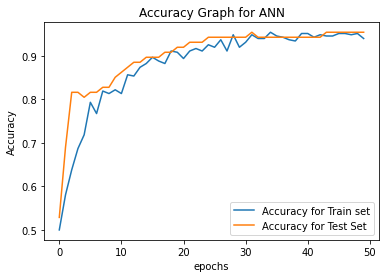

In [53]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

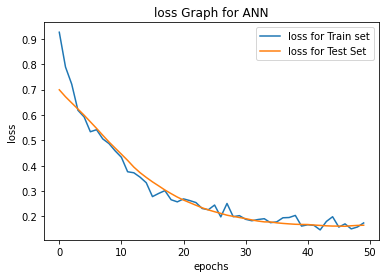

In [54]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [55]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

Accuracy:  0.9540229885057471
Recall:  0.9428571428571428
Precision:  0.9428571428571428
[[50  2]
 [ 2 33]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [56]:
rank7  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "mutual_info").set_index('Attributes_Names')
df_mutual = df[rank7[:12].index]
X_col =  df_mutual
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 12)
Shape of testing data (87, 12)


In [57]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [58]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 8)                 104       
_________________________________________________________________
batch_normalization_12 (Batc (None, 8)                 32        
_________________________________________________________________
dense_25 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_13 (Batc (None, 16)                64        
_________________________________________________________________
dense_26 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [60]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 2s 34ms/step - loss: 0.5538 - accuracy: 0.7385 - val_loss: 0.6408 - val_accuracy: 0.4598
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.5342 - accuracy: 0.7500 - val_loss: 0.5938 - val_accuracy: 0.7586
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4443 - accuracy: 0.8247 - val_loss: 0.5488 - val_accuracy: 0.7931
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4086 - accuracy: 0.8276 - val_loss: 0.5057 - val_accuracy: 0.8391
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.3676 - accuracy: 0.8592 - val_loss: 0.4653 - val_accuracy: 0.8506
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.3699 - accuracy: 0.8420 - val_loss: 0.4262 - val_accuracy: 0.8621
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.3092 - accuracy: 0.8793 - val_loss: 0.3903 - val_accuracy: 0.8506
Epoch 8/50
11/11 [=

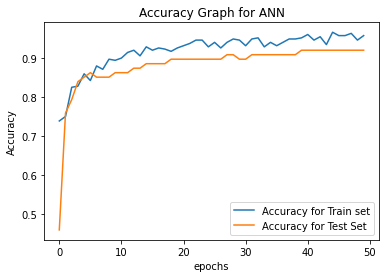

In [61]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

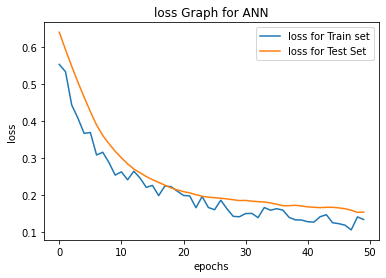

In [62]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [63]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

Accuracy:  0.9195402298850575
Recall:  0.8857142857142857
Precision:  0.9117647058823529
[[49  3]
 [ 4 31]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [64]:
rank8  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "Pearson_Correlation").set_index('Attributes_Names')
df_pearson =  df[rank8[:12].index]
X_col =  df_pearson
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 12)
Shape of testing data (87, 12)


In [65]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9310344827586207
Recall:  0.8571428571428571
Precision:  0.967741935483871
[[51  1]
 [ 5 30]]


In [66]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 8)                 104       
_________________________________________________________________
batch_normalization_14 (Batc (None, 8)                 32        
_________________________________________________________________
dense_29 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_15 (Batc (None, 16)                64        
_________________________________________________________________
dense_30 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_7 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                

In [68]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 3s 33ms/step - loss: 0.8650 - accuracy: 0.5029 - val_loss: 0.6593 - val_accuracy: 0.4713
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 0.7479 - accuracy: 0.5948 - val_loss: 0.6140 - val_accuracy: 0.7126
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.6378 - accuracy: 0.6782 - val_loss: 0.5705 - val_accuracy: 0.8276
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5625 - accuracy: 0.7184 - val_loss: 0.5293 - val_accuracy: 0.8276
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 0.5104 - accuracy: 0.7356 - val_loss: 0.4889 - val_accuracy: 0.8621
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4526 - accuracy: 0.8103 - val_loss: 0.4529 - val_accuracy: 0.8621
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4298 - accuracy: 0.8247 - val_loss: 0.4177 - val_accuracy: 0.9195
Epoch 8/50
11/11 [=

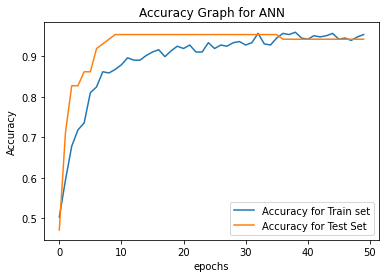

In [69]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

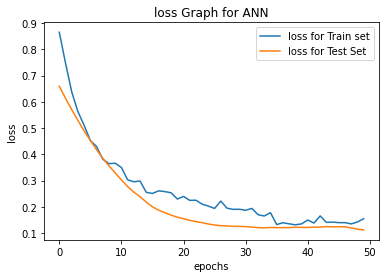

In [70]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [71]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

Accuracy:  0.9425287356321839
Recall:  0.9428571428571428
Precision:  0.9166666666666666
[[49  3]
 [ 2 33]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [72]:
OWA =  rank8  = pd.read_excel("/content/voting84_dataset.xlsx",sheet_name = "OWA_method").set_index('Attributes_Name')
df_owa  = df[OWA[:12].index]
X_col =  df_owa
y = df['Class Name']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (348, 12)
Shape of testing data (87, 12)


In [73]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
pred =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,pred))
print("Recall: ", recall_score(y_test,pred))
print("Precision: ", precision_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy:  0.9655172413793104
Recall:  0.9428571428571428
Precision:  0.9705882352941176
[[51  1]
 [ 2 33]]


In [74]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy:  0.9770114942528736
Recall:  0.9714285714285714
Precision:  0.9714285714285714
[[51  1]
 [ 1 34]]


In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 8)                 104       
_________________________________________________________________
batch_normalization_16 (Batc (None, 8)                 32        
_________________________________________________________________
dense_33 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_17 (Batc (None, 16)                64        
_________________________________________________________________
dense_34 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                

In [76]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 2s 33ms/step - loss: 0.7166 - accuracy: 0.5948 - val_loss: 0.6389 - val_accuracy: 0.8391
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 0.6092 - accuracy: 0.6897 - val_loss: 0.6106 - val_accuracy: 0.8621
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 0.5546 - accuracy: 0.7126 - val_loss: 0.5781 - val_accuracy: 0.8621
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.4899 - accuracy: 0.7787 - val_loss: 0.5422 - val_accuracy: 0.8851
Epoch 5/50
11/11 [==============================] - 0s 10ms/step - loss: 0.4536 - accuracy: 0.7931 - val_loss: 0.5034 - val_accuracy: 0.9080
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 0.4036 - accuracy: 0.8276 - val_loss: 0.4637 - val_accuracy: 0.9195
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 0.3696 - accuracy: 0.8420 - val_loss: 0.4259 - val_accuracy: 0.9540
Epoch 8/50
11/11 [

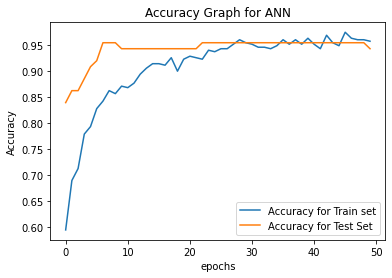

In [77]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

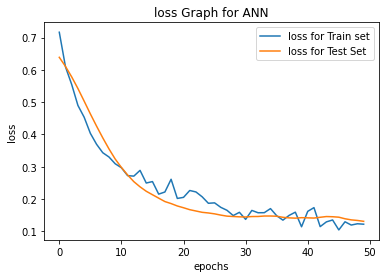

In [78]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [80]:
y_pred_ann_owa = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann_owa))
print("Recall: ", recall_score(y_test,y_pred_ann_owa))
print("Precision: ", precision_score(y_test,y_pred_ann_owa))
print(confusion_matrix(y_test,y_pred_ann_owa))

Accuracy:  0.9425287356321839
Recall:  0.9142857142857143
Precision:  0.9411764705882353
[[50  2]
 [ 3 32]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
